# Neural Net

In [1]:
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import accuracy_score, classification_report

from helpers import plot_confusion_matrices

In [2]:
# File paths for the pickle files
x_train_path = 'data/X_train.pkl'
x_test_path = 'data/X_test.pkl'
y_train_path = 'data/y_train.pkl'
y_test_path = 'data/y_test.pkl'

# Reading the pickle files
with open(x_train_path, 'rb') as file:
    X_train = pickle.load(file)

with open(x_test_path, 'rb') as file:
    X_test = pickle.load(file)

with open(y_train_path, 'rb') as file:
    y_train = pickle.load(file)

with open(y_test_path, 'rb') as file:
    y_test = pickle.load(file)

In [3]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(4137, 3000)
X_test.shape=(1035, 3000)
y_train.shape=(4137,)
y_test.shape=(1035,)


In [4]:
# Model definition
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [5]:
history = nn_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)
# loss, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

y_pred_test = (nn_model.predict(X_test) > 0.5).astype("int32")

print(f"Test Accuracy:{accuracy_score(y_test, y_pred_test):>10.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Test Accuracy:     0.981

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       739
           1       0.95      0.98      0.97       296

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


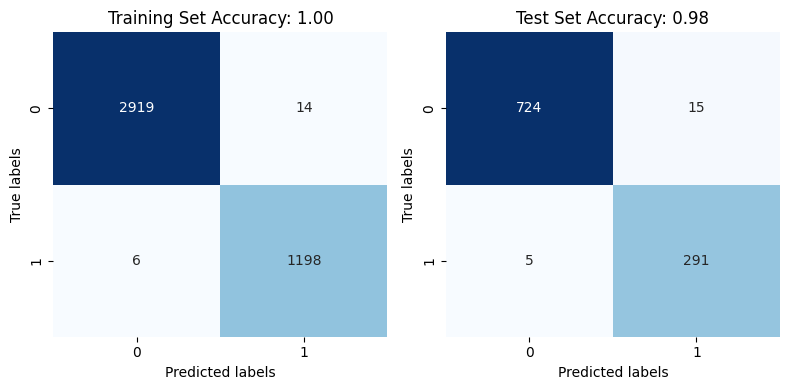

In [6]:
y_pred_train = (nn_model.predict(X_train) > 0.5).astype("int32")

plot_confusion_matrices(y_train, y_pred_train, y_test, y_pred_test)